# POLI JÚNIOR + TOTAL PASS
### ANÁLISE DA CLUSTERIZAÇÃO

Estatísticas Descritivas por Cluster:
              Age                                                      \
            count       mean        std  min   25%   50%   75%    max   
cluster                                                                 
0        107096.0  32.355905   8.940220  0.0  26.0  31.0  38.0   95.0   
1        105932.0  32.477854  11.188864  0.0  25.0  30.0  38.0  100.0   
2        165044.0  33.356862  10.577167  0.0  26.0  31.0  39.0   96.0   
3         90031.0  33.537904   9.994342  0.0  27.0  31.0  38.0   99.0   
4        113632.0  32.683056  11.254960  0.0  25.0  30.0  39.0   96.0   
5        146404.0  34.762172   9.943387  0.0  28.0  33.0  40.0   97.0   
6         82153.0  30.734155  10.609431  0.0  23.0  29.0  36.0  100.0   
7        105859.0  33.159505   9.197055  0.0  27.0  31.0  38.0  100.0   

        count_subscriptions            ... NumGymsNearCompany         \
                      count      mean  ...                75%    max   
cluster       

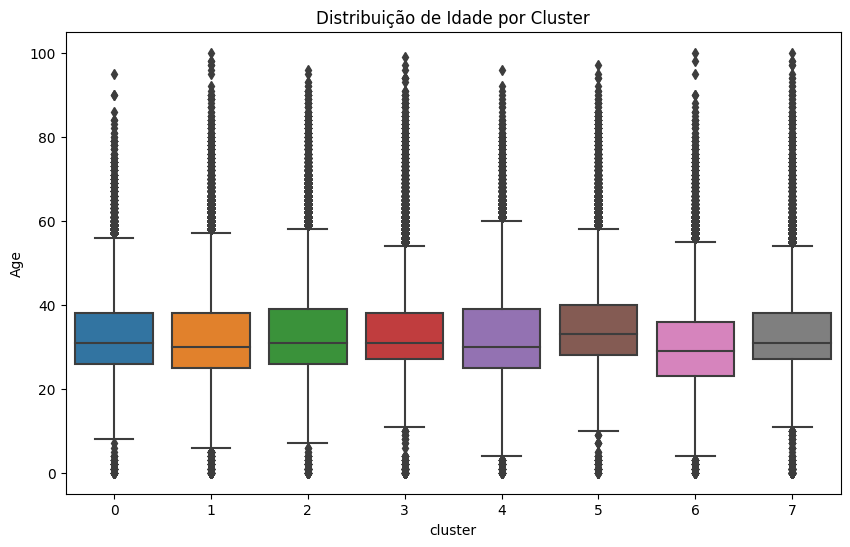

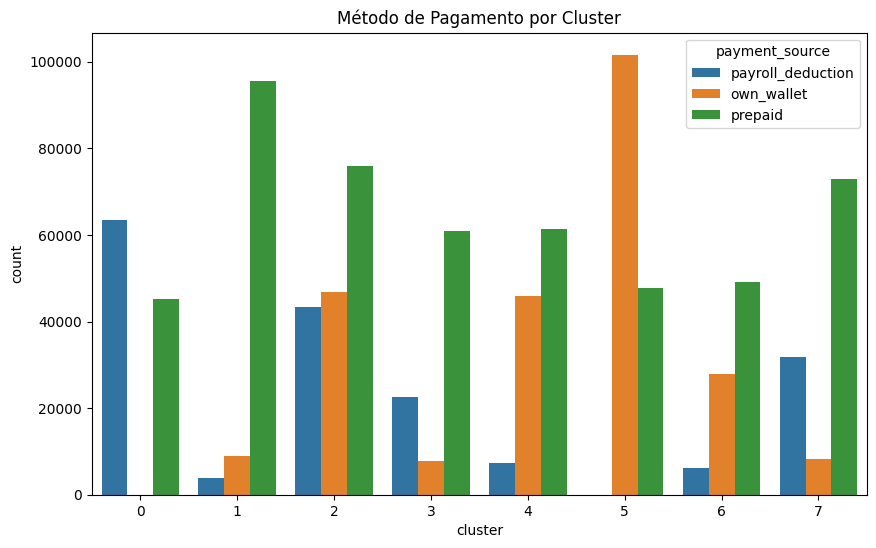

ANOVA para Idade: F-Value = nan, P-Value = nan
Teste de Qui-quadrado para Método de Pagamento: Chi2 = 379249.8233647809, P-Value = 0.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal, chi2_contingency

# Carregue seu DataFrame aqui. Exemplo:
df = pd.read_csv('/home/bernardo_teixeira/Documents/pj/TOTALPASS/Tabelas/df_cluster.csv')
subs = pd.read_csv('/home/bernardo_teixeira/Documents/pj/TOTALPASS/Tabelas/subscriptions_features_dataset.csv')
df2 = pd.merge(df, subs, how= 'left', on= ['employee_id'])
df2 = df2.drop_duplicates(subset='employee_id')
mapping = {'available': 1.0, 'cancelled': 0.0}
df2['subscription_status'] = df2['subscription_status'].replace(mapping)
# Assumindo que df é o seu DataFrame e que 'cluster_labels' são os rótulos dos clusters
# df['Cluster'] = cluster_labels  # Se os rótulos dos clusters já não estiverem no DataFrame

# Análise Descritiva
# Calculando estatísticas descritivas para variáveis numéricas por cluster
desc_stats = df2.groupby('cluster')[['Age', 'count_subscriptions', 'NumGymsWithinRadius', 'NumGymsNearCompany', 'distancia_cliente_empresa']].describe()

print("Estatísticas Descritivas por Cluster:")
print(desc_stats)

# Análise Visual
# Distribuição de Idade por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='Age', data=df2)
plt.title('Distribuição de Idade por Cluster')
plt.show()

# Método de Pagamento por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='payment_source', data=df2)
plt.title('Método de Pagamento por Cluster')
plt.show()

# Testes Estatísticos para Variáveis Numéricas
# Teste ANOVA para 'Age'
f_val, p_val = f_oneway(*[group['Age'].values for subscription_id, group in df2.groupby('cluster')])
print(f"ANOVA para Idade: F-Value = {f_val}, P-Value = {p_val}")

# Testes de Kruskal-Wallis para outras variáveis numéricas, se necessário

# Teste de Qui-quadrado para Variáveis Categóricas
# Para 'payment_source'
contingency_table = pd.crosstab(df2['cluster'], df2['payment_source'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Teste de Qui-quadrado para Método de Pagamento: Chi2 = {chi2}, P-Value = {p}")

# Interpretando os resultados
# Baseado nos resultados acima, você pode determinar quais variáveis têm diferenças significativas entre os clusters.


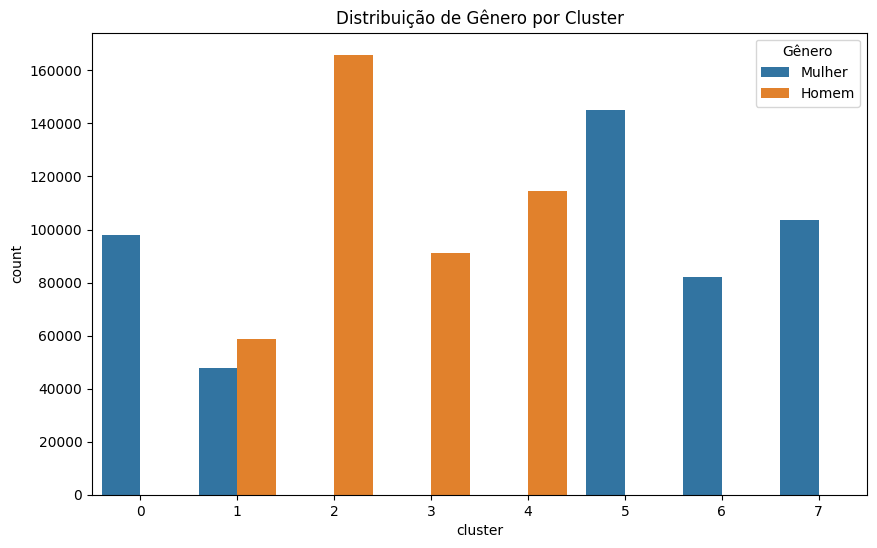

Teste de Qui-quadrado para Gênero: Chi2 = 801291.7448784932, P-Value = 0.0


In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='gender_maped', data=df2)
plt.title('Distribuição de Gênero por Cluster')
plt.legend(title='Gênero', labels=['Mulher', 'Homem'])
plt.show()

# Teste de Qui-quadrado para Gênero
contingency_gender = pd.crosstab(df2['cluster'], df2['gender_maped'])
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_gender)
print(f"Teste de Qui-quadrado para Gênero: Chi2 = {chi2_gender}, P-Value = {p_gender}")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df2

,cluster,employee_id,subscription_id,company_id,company_plan_id,country_id,created_at,started_at,suspended_at,canceled_at,subscription_status,subscription_cancellation_id,migrated_from_subscription_id,payment_source,type_mapped,Age,gender_maped,upgrade,count_subscriptions,numero_de_ids_distintos,Binario_fee,Fee,NumGymsWithinRadius,NumGymsNearCompany,distancia_cliente_empresa
0,0,59947,432,65,148,2,2017-08-22 15:41:14.275,2017-08-22 00:00:00.000,NaN,2018-02-22 23:59:59,0.0,799.0,NaN,payroll_deduction,0.0,47.0,NaN,0,2,0.0,0.0,0.0,0.0,547,NaN
2,0,117495,630,65,148,2,2017-08-23 21:58:40.506,2017-09-23 00:00:00.000,NaN,2018-07-23 23:59:59,0.0,3612.0,627.0,payroll_deduction,0.0,27.0,NaN,1,5,0.0,0.0,0.0,0.0,547,NaN
8,0,81798,722,57,116,2,2017-08-25 10:01:57.477,2017-08-25 00:00:00.000,NaN,2017-11-25 23:59:59,0.0,101768.0,NaN,payroll_deduction,0.0,44.0,NaN,0,2,0.0,1.0,250.0,53.0,217,321.749278
11,0,117496,968,65,148,2,2017-08-28 21:08:38.938,2017-08-28 00:00:00.000,NaN,2019-03-28 23:59:59,0.0,8291.0,NaN,payroll_deduction,0.0,25.0,NaN,0,2,0.0,0.0,0.0,0.0,547,NaN
13,0,32337,1054,65,148,2,2017-08-29 16:22:51.116,2017-08-29 00:00:00.000,NaN,2017-09-01 23:59:59,0.0,101831.0,NaN,payroll_deduction,0.0,36.0,NaN,0,3,0.0,0.0,0.0,78.0,547,18.487444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377172,2,2089535,1826970,4707,23516,2,2023-11-16 13:32:23.484,2023-11-16 00:00:00.000,NaN,NaN,1.0,NaN,NaN,prepaid,0.0,39.0,1.0,0,1,0.0,NaN,NaN,94.0,344,350.189667
1377173,5,2060511,1827232,9941,38027,2,2023-11-16 14:28:08.733,2023-11-16 00:00:00.000,NaN,NaN,1.0,NaN,NaN,prepaid,0.0,18.0,0.0,0,1,0.0,NaN,NaN,7.0,438,1499.338915
1377174,6,2091031,1827958,30070,117528,2,2023-11-16 17:17:14.787,2023-11-16 00:00:00.000,NaN,NaN,1.0,NaN,NaN,prepaid,1.0,25.0,0.0,0,1,0.0,NaN,NaN,116.0,130,334.501398
1377175,7,2091403,1828621,347,161687,2,2023-11-16 19:12:07.221,2023-11-16 00:00:00.000,NaN,NaN,1.0,NaN,NaN,prepaid,0.0,33.0,0.0,0,1,0.0,NaN,NaN,79.0,353,23.346344


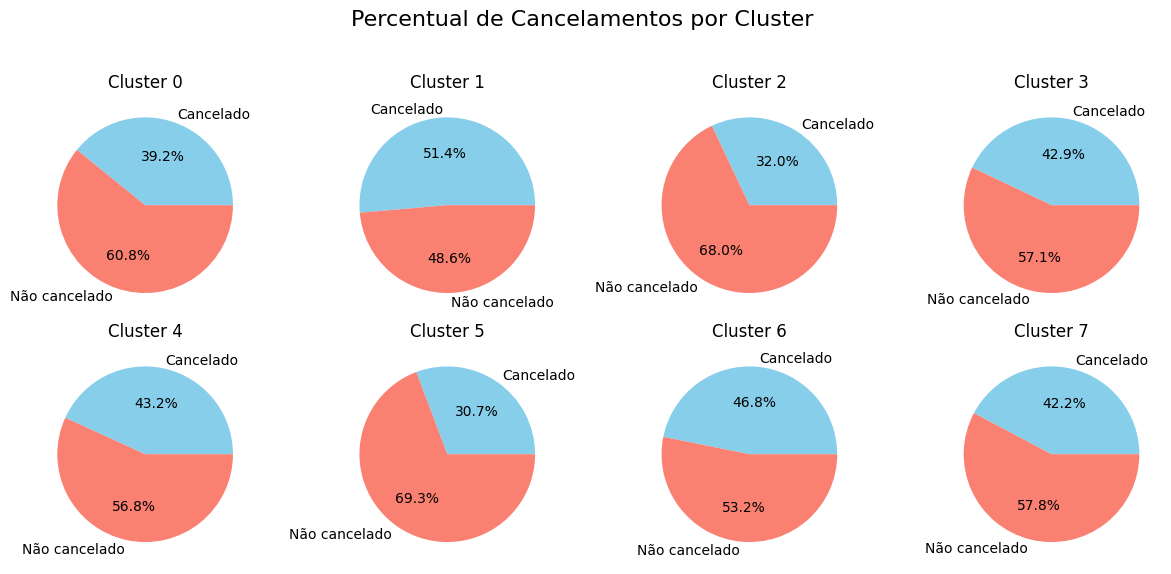

In [6]:
import matplotlib.pyplot as plt

# Substituindo os valores no DataFrame
df2['subscription_status'] = df2['subscription_status'].replace({0: 'Não cancelado', 'suspended': 'Não cancelado', 1: 'Cancelado'})

# Agrupando os dados por cluster e status de cancelamento
grouped = df2.groupby(['cluster', 'subscription_status']).size().unstack()

# Plotando o gráfico de pizza
plt.figure(figsize=(12, 6))  # Ajuste o tamanho conforme necessário

# Calcula o número de linhas necessário com base no total de clusters válidos
n_clusters = len(grouped)
n_cols = 4
n_rows = 2

for i, (cluster, data) in enumerate(grouped.iterrows(), start=1):
    ax = plt.subplot(n_rows, n_cols, i)  # Ajusta para 2 linhas e 4 colunas
    data.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], ax=ax)
    plt.ylabel('')  # Remove o rótulo do eixo y
    plt.title(f'Cluster {cluster}')

plt.suptitle('Percentual de Cancelamentos por Cluster', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta o layout para evitar sobreposições
plt.show()



   cluster  Não Upgrade/Upgrade Ratio
0        0                   7.784125
1        1                  12.040966
2        2                   8.472913
3        3                   9.297044
4        4                   9.055429
5        5                   8.106409
6        6                   8.360541
7        7                  10.525565


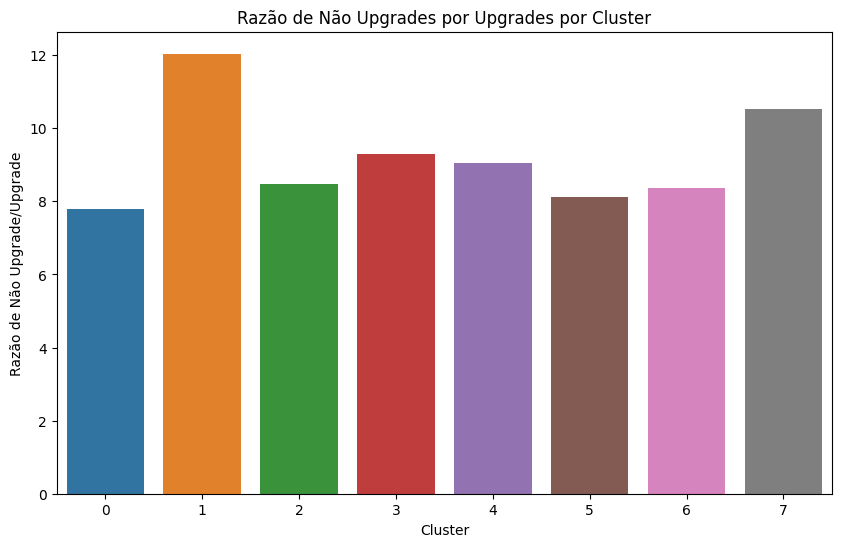

In [8]:
upgrade_counts = df2.groupby('cluster')['upgrade'].value_counts().unstack(fill_value=0)

# Calcular a razão de não upgrades (0) por upgrades (1)
upgrade_ratio = upgrade_counts[0] / upgrade_counts[1]

# Resetar o índice para facilitar a visualização
upgrade_ratio = upgrade_ratio.reset_index()
upgrade_ratio.columns = ['cluster', 'Não Upgrade/Upgrade Ratio']

print(upgrade_ratio)
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='Não Upgrade/Upgrade Ratio', data=upgrade_ratio)
plt.title('Razão de Não Upgrades por Upgrades por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Razão de Não Upgrade/Upgrade')
plt.show()

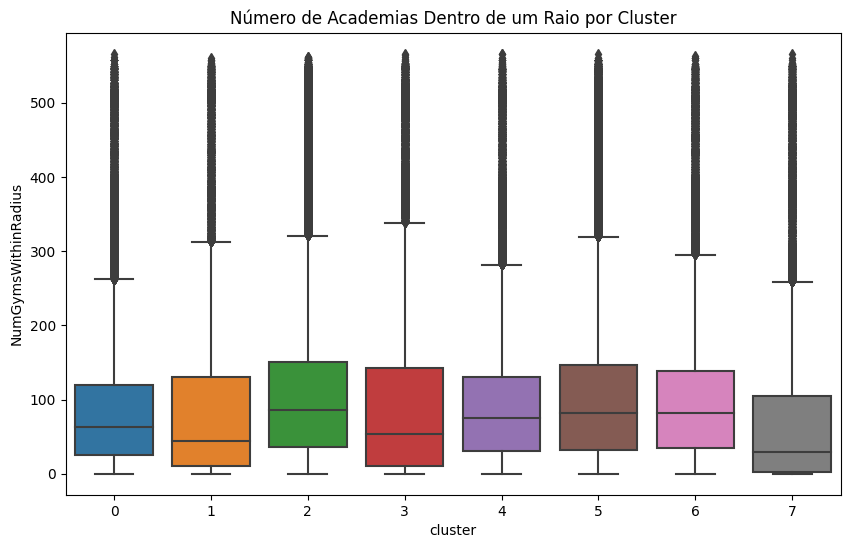

ANOVA para Número de Academias Dentro de um Raio: F-Value = 2403.792674010633, P-Value = 0.0


In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='NumGymsWithinRadius', data=df2)
plt.title('Número de Academias Dentro de um Raio por Cluster')
plt.show()

# Teste ANOVA para 'NumGymsWithinRadius'
f_val_gyms_radius, p_val_gyms_radius = f_oneway(*[group['NumGymsWithinRadius'].values for name, group in df2.groupby('cluster')])
print(f"ANOVA para Número de Academias Dentro de um Raio: F-Value = {f_val_gyms_radius}, P-Value = {p_val_gyms_radius}")

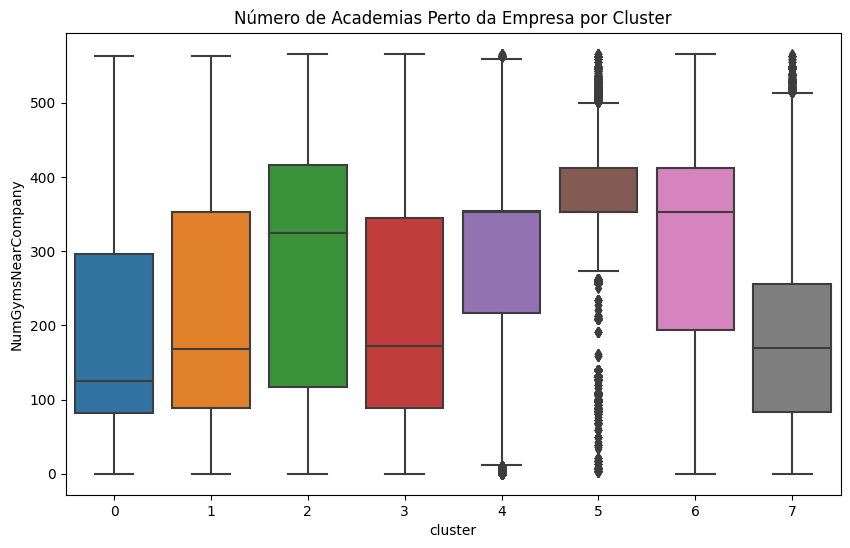

ANOVA para Número de Academias Perto da Empresa: F-Value = 26596.592937458878, P-Value = 0.0


In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='NumGymsNearCompany', data=df2)
plt.title('Número de Academias Perto da Empresa por Cluster')
plt.show()

# Teste ANOVA para 'NumGymsNearCompany'
f_val_gyms_company, p_val_gyms_company = f_oneway(*[group['NumGymsNearCompany'].values for name, group in df2.groupby('cluster')])
print(f"ANOVA para Número de Academias Perto da Empresa: F-Value = {f_val_gyms_company}, P-Value = {p_val_gyms_company}")

In [11]:
media_dist_cluster = df2.groupby('cluster')['distancia_cliente_empresa'].mean().reset_index()
print('Média de distância até a empresa por cluster:')
print(media_dist_cluster)

Média de distância até a empresa por cluster:
   cluster  distancia_cliente_empresa
0        0                 337.213482
1        1                 167.331686
2        2                 309.048070
3        3                 146.996984
4        4                 441.181641
5        5                 449.904596
6        6                 396.978346
7        7                 154.212042


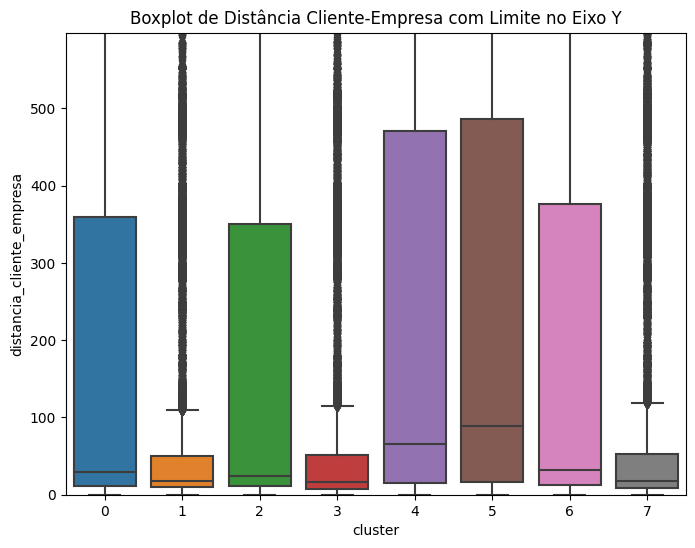

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='distancia_cliente_empresa', data=df2)
plt.ylim(0, df2['distancia_cliente_empresa'].quantile(0.85)) # Limitando até o percentil 95
plt.title('Boxplot de Distância Cliente-Empresa com Limite no Eixo Y')
plt.show()

In [13]:
media_numgyms_cluster = df2.groupby('cluster')['NumGymsNearCompany'].mean().reset_index()
print('Média de número de academias próximas à empresa por cluster:')
print(media_numgyms_cluster)

Média de número de academias próximas à empresa por cluster:
   cluster  NumGymsNearCompany
0        0          199.929405
1        1          200.581513
2        2          282.000855
3        3          206.087583
4        4          298.404242
5        5          364.937155
6        6          299.334911
7        7          185.421941
